# Stock Price Simulation with Monte Carlo

#### Problem: Simulate future stock prices using random numbers (Geometric Brownian Motion).
Questions to solve:

    - Can you generate 1,000 possible price paths for a stock starting at $100 over 1 year?

    - What’s the expected final stock price?

    - What’s the probability the stock ends above $120?

In [116]:
import numpy as np

In [117]:
np.arange(2, 300)

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 18

In [118]:
np.arange(2, 300, 20)

array([  2,  22,  42,  62,  82, 102, 122, 142, 162, 182, 202, 222, 242,
       262, 282])

In [119]:
np.linspace(20, 1000, 500)

array([  20.        ,   21.96392786,   23.92785571,   25.89178357,
         27.85571142,   29.81963928,   31.78356713,   33.74749499,
         35.71142285,   37.6753507 ,   39.63927856,   41.60320641,
         43.56713427,   45.53106212,   47.49498998,   49.45891784,
         51.42284569,   53.38677355,   55.3507014 ,   57.31462926,
         59.27855711,   61.24248497,   63.20641283,   65.17034068,
         67.13426854,   69.09819639,   71.06212425,   73.0260521 ,
         74.98997996,   76.95390782,   78.91783567,   80.88176353,
         82.84569138,   84.80961924,   86.77354709,   88.73747495,
         90.70140281,   92.66533066,   94.62925852,   96.59318637,
         98.55711423,  100.52104208,  102.48496994,  104.4488978 ,
        106.41282565,  108.37675351,  110.34068136,  112.30460922,
        114.26853707,  116.23246493,  118.19639279,  120.16032064,
        122.1242485 ,  124.08817635,  126.05210421,  128.01603206,
        129.97995992,  131.94388778,  133.90781563,  135.87174

In [120]:
array = np.linspace(20, 21, 100)
array

array([20.        , 20.01010101, 20.02020202, 20.03030303, 20.04040404,
       20.05050505, 20.06060606, 20.07070707, 20.08080808, 20.09090909,
       20.1010101 , 20.11111111, 20.12121212, 20.13131313, 20.14141414,
       20.15151515, 20.16161616, 20.17171717, 20.18181818, 20.19191919,
       20.2020202 , 20.21212121, 20.22222222, 20.23232323, 20.24242424,
       20.25252525, 20.26262626, 20.27272727, 20.28282828, 20.29292929,
       20.3030303 , 20.31313131, 20.32323232, 20.33333333, 20.34343434,
       20.35353535, 20.36363636, 20.37373737, 20.38383838, 20.39393939,
       20.4040404 , 20.41414141, 20.42424242, 20.43434343, 20.44444444,
       20.45454545, 20.46464646, 20.47474747, 20.48484848, 20.49494949,
       20.50505051, 20.51515152, 20.52525253, 20.53535354, 20.54545455,
       20.55555556, 20.56565657, 20.57575758, 20.58585859, 20.5959596 ,
       20.60606061, 20.61616162, 20.62626263, 20.63636364, 20.64646465,
       20.65656566, 20.66666667, 20.67676768, 20.68686869, 20.69

In [121]:
array.T

array([20.        , 20.01010101, 20.02020202, 20.03030303, 20.04040404,
       20.05050505, 20.06060606, 20.07070707, 20.08080808, 20.09090909,
       20.1010101 , 20.11111111, 20.12121212, 20.13131313, 20.14141414,
       20.15151515, 20.16161616, 20.17171717, 20.18181818, 20.19191919,
       20.2020202 , 20.21212121, 20.22222222, 20.23232323, 20.24242424,
       20.25252525, 20.26262626, 20.27272727, 20.28282828, 20.29292929,
       20.3030303 , 20.31313131, 20.32323232, 20.33333333, 20.34343434,
       20.35353535, 20.36363636, 20.37373737, 20.38383838, 20.39393939,
       20.4040404 , 20.41414141, 20.42424242, 20.43434343, 20.44444444,
       20.45454545, 20.46464646, 20.47474747, 20.48484848, 20.49494949,
       20.50505051, 20.51515152, 20.52525253, 20.53535354, 20.54545455,
       20.55555556, 20.56565657, 20.57575758, 20.58585859, 20.5959596 ,
       20.60606061, 20.61616162, 20.62626263, 20.63636364, 20.64646465,
       20.65656566, 20.66666667, 20.67676768, 20.68686869, 20.69

In [122]:
array2 = np.linspace(9, 20, 20)

In [123]:
array2.shape, array.shape

((20,), (100,))

In [124]:
array3 = array[:20]
array3

array([20.        , 20.01010101, 20.02020202, 20.03030303, 20.04040404,
       20.05050505, 20.06060606, 20.07070707, 20.08080808, 20.09090909,
       20.1010101 , 20.11111111, 20.12121212, 20.13131313, 20.14141414,
       20.15151515, 20.16161616, 20.17171717, 20.18181818, 20.19191919])

In [125]:
array3.shape

(20,)

In [126]:
array3 * array2

array([180.        , 191.67570441, 203.36310473, 215.06220096,
       226.77299309, 238.49548113, 250.22966507, 261.97554492,
       273.73312068, 285.50239234, 297.28335991, 309.07602339,
       320.88038278, 332.69643806, 344.52418926, 356.36363636,
       368.21477937, 380.07761829, 391.95215311, 403.83838384])

In [127]:
print(array3 * array2)

[180.         191.67570441 203.36310473 215.06220096 226.77299309
 238.49548113 250.22966507 261.97554492 273.73312068 285.50239234
 297.28335991 309.07602339 320.88038278 332.69643806 344.52418926
 356.36363636 368.21477937 380.07761829 391.95215311 403.83838384]


In [128]:
result = array3 * array2
result.shape

(20,)

In [129]:
integers = [int(round(r * 100, 0)) for r in result]
integers

[18000,
 19168,
 20336,
 21506,
 22677,
 23850,
 25023,
 26198,
 27373,
 28550,
 29728,
 30908,
 32088,
 33270,
 34452,
 35636,
 36821,
 38008,
 39195,
 40384]

In [130]:
np.empty(2)

array([1., 1.])

In [131]:
np.ones(20)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [132]:
# start = 100, count = 1000, 12

stocks = np.linspace(100, 12, 1000)
stocks

array([100.        ,  99.91191191,  99.82382382,  99.73573574,
        99.64764765,  99.55955956,  99.47147147,  99.38338338,
        99.2952953 ,  99.20720721,  99.11911912,  99.03103103,
        98.94294294,  98.85485485,  98.76676677,  98.67867868,
        98.59059059,  98.5025025 ,  98.41441441,  98.32632633,
        98.23823824,  98.15015015,  98.06206206,  97.97397397,
        97.88588589,  97.7977978 ,  97.70970971,  97.62162162,
        97.53353353,  97.44544545,  97.35735736,  97.26926927,
        97.18118118,  97.09309309,  97.00500501,  96.91691692,
        96.82882883,  96.74074074,  96.65265265,  96.56456456,
        96.47647648,  96.38838839,  96.3003003 ,  96.21221221,
        96.12412412,  96.03603604,  95.94794795,  95.85985986,
        95.77177177,  95.68368368,  95.5955956 ,  95.50750751,
        95.41941942,  95.33133133,  95.24324324,  95.15515516,
        95.06706707,  94.97897898,  94.89089089,  94.8028028 ,
        94.71471471,  94.62662663,  94.53853854,  94.45

In [133]:
stocks.sort()
stocks

array([ 12.        ,  12.08808809,  12.17617618,  12.26426426,
        12.35235235,  12.44044044,  12.52852853,  12.61661662,
        12.7047047 ,  12.79279279,  12.88088088,  12.96896897,
        13.05705706,  13.14514515,  13.23323323,  13.32132132,
        13.40940941,  13.4974975 ,  13.58558559,  13.67367367,
        13.76176176,  13.84984985,  13.93793794,  14.02602603,
        14.11411411,  14.2022022 ,  14.29029029,  14.37837838,
        14.46646647,  14.55455455,  14.64264264,  14.73073073,
        14.81881882,  14.90690691,  14.99499499,  15.08308308,
        15.17117117,  15.25925926,  15.34734735,  15.43543544,
        15.52352352,  15.61161161,  15.6996997 ,  15.78778779,
        15.87587588,  15.96396396,  16.05205205,  16.14014014,
        16.22822823,  16.31631632,  16.4044044 ,  16.49249249,
        16.58058058,  16.66866867,  16.75675676,  16.84484484,
        16.93293293,  17.02102102,  17.10910911,  17.1971972 ,
        17.28528529,  17.37337337,  17.46146146,  17.54

In [134]:

arr1 = np.arange(2, 10)
arr2 = np.arange(3, 10)

arr1, arr2

(array([2, 3, 4, 5, 6, 7, 8, 9]), array([3, 4, 5, 6, 7, 8, 9]))

In [135]:
random_marks = np.linspace(50, 100, 20)
random_marks

array([ 50.        ,  52.63157895,  55.26315789,  57.89473684,
        60.52631579,  63.15789474,  65.78947368,  68.42105263,
        71.05263158,  73.68421053,  76.31578947,  78.94736842,
        81.57894737,  84.21052632,  86.84210526,  89.47368421,
        92.10526316,  94.73684211,  97.36842105, 100.        ])

In [136]:
random_marks.sort()
random_marks

array([ 50.        ,  52.63157895,  55.26315789,  57.89473684,
        60.52631579,  63.15789474,  65.78947368,  68.42105263,
        71.05263158,  73.68421053,  76.31578947,  78.94736842,
        81.57894737,  84.21052632,  86.84210526,  89.47368421,
        92.10526316,  94.73684211,  97.36842105, 100.        ])

In [137]:
random_marks.sort(axis=0)
random_marks

array([ 50.        ,  52.63157895,  55.26315789,  57.89473684,
        60.52631579,  63.15789474,  65.78947368,  68.42105263,
        71.05263158,  73.68421053,  76.31578947,  78.94736842,
        81.57894737,  84.21052632,  86.84210526,  89.47368421,
        92.10526316,  94.73684211,  97.36842105, 100.        ])

In [138]:
random_marks.sort(axis=1)
random_marks

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
random_marks.diagonal

<function ndarray.diagonal>

In [ ]:
random_marks.shape

(20,)

In [ ]:
random_marks.size

20

In [ ]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])

np.concatenate((a, b))

array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
arr1 = np.arange(2, 10)
arr2 = np.arange(3, 10)

np.concatenate((arr1, arr2))

array([2, 3, 4, 5, 6, 7, 8, 9, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
new = np.concatenate((array3, array2))
new

array([20.        , 20.01010101, 20.02020202, 20.03030303, 20.04040404,
       20.05050505, 20.06060606, 20.07070707, 20.08080808, 20.09090909,
       20.1010101 , 20.11111111, 20.12121212, 20.13131313, 20.14141414,
       20.15151515, 20.16161616, 20.17171717, 20.18181818, 20.19191919,
        9.        ,  9.57894737, 10.15789474, 10.73684211, 11.31578947,
       11.89473684, 12.47368421, 13.05263158, 13.63157895, 14.21052632,
       14.78947368, 15.36842105, 15.94736842, 16.52631579, 17.10526316,
       17.68421053, 18.26315789, 18.84210526, 19.42105263, 20.        ])

In [ ]:
new.size, new.shape

(40, (40,))

In [ ]:
one = np.array([3, 4, 55, 0])
two = np.array(
    [
    [4, 6, 44, 67], 
    [9, 3, 3, 2]
    ])
three = np.array([
    [
        [45, 45, 33, 55], 
        [9, 5, 66, 3], 
        [9, 4, 4, 5,]
        ]
    ])

In [ ]:
one, two, three

(array([ 3,  4, 55,  0]),
 array([[ 4,  6, 44, 67],
        [ 9,  3,  3,  2]]),
 array([[[45, 45, 33, 55],
         [ 9,  5, 66,  3],
         [ 9,  4,  4,  5]]]))

In [ ]:
# concat = np.concatenate((one, two), axis=0)
one.shape, two.shape, three.shape

((4,), (2, 4), (1, 3, 4))

In [ ]:
one.ndim, two.ndim, three.ndim

(1, 2, 3)

In [ ]:
# Reshape
one.reshape((2, 2))

array([[ 3,  4],
       [55,  0]])

In [ ]:
two.reshape((2, 4))

array([[ 4,  6, 44, 67],
       [ 9,  3,  3,  2]])

In [ ]:
three.size

12

In [ ]:
# 2 * 6, 3 * 4, 

three.reshape((3, 4))

array([[45, 45, 33, 55],
       [ 9,  5, 66,  3],
       [ 9,  4,  4,  5]])

In [ ]:
three.reshape((2, 6))

array([[45, 45, 33, 55,  9,  5],
       [66,  3,  9,  4,  4,  5]])

In [ ]:
three.reshape((6, 2))

array([[45, 45],
       [33, 55],
       [ 9,  5],
       [66,  3],
       [ 9,  4],
       [ 4,  5]])

In [ ]:
three.reshape((1, 12))

array([[45, 45, 33, 55,  9,  5, 66,  3,  9,  4,  4,  5]])

In [ ]:
three.shape

(1, 3, 4)

In [ ]:
three.sum()

283

In [ ]:
three.shape

(1, 3, 4)

In [ ]:
filpped = np.flip(three)
three,  filpped

(array([[[45, 45, 33, 55],
         [ 9,  5, 66,  3],
         [ 9,  4,  4,  5]]]),
 array([[[ 5,  4,  4,  9],
         [ 3, 66,  5,  9],
         [55, 33, 45, 45]]]))

In [ ]:
filpped.flatten()

array([ 5,  4,  4,  9,  3, 66,  5,  9, 55, 33, 45, 45])

In [ ]:
len?

Signature: len(obj, /)
Docstring: Return the number of items in a container.
Type:      builtin_function_or_method


In [ ]:
np?


Type:        module
String form: <module 'numpy' from '/home/dukelester/anaconda3/lib/python3.9/site-packages/numpy/__init__.py'>
File:        ~/anaconda3/lib/python3.9/site-packages/numpy/__init__.py
Docstring:  
NumPy
=====

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

How to use the documentation
----------------------------
Documentation is available in two forms: docstrings provided
with the code, and a loose standing reference guide, available from
`the NumPy homepage <https://www.scipy.org>`_.

We recommend exploring the docstrings using
`IPython <https://ipython.org>`_, an advanced Python shell with
TAB-completion and introspection capabilities.  See below for further
instructions.

The docstring examples assume that `numpy` has been imported as `np`::

  >>> import numpy as np

Code snippets are indicated by three greater-than signs::

  >>> x = 42
 

1. Can you generate 1,000 possible price paths for a stock starting at $100 over 1 year?

In [139]:
import matplotlib.pyplot as plt

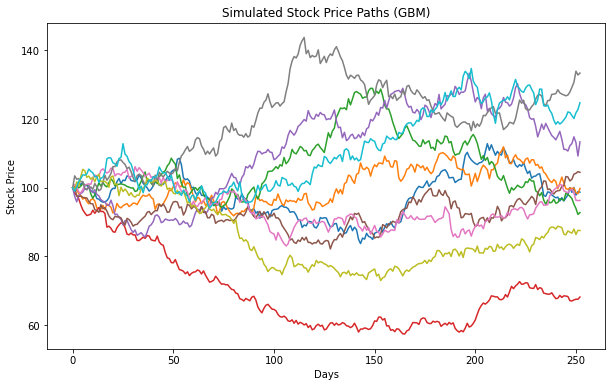

In [142]:
# The parameters

s0 = 100 # Initial stock price
mu = 0.1
sigma = 0.2
T = 1
N = 252
dt = T / N
paths = 1000


# Generate the normal random numbers

Z = np.random.normal(0, 1, (N, paths))

# Stock price matrix
S = np.zeros((N+1, paths))
S[0] = s0

for t in range(1, N + 1):
    S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[t-1])
    
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10])
plt.title("Simulated Stock Price Paths (GBM)")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.show()


In [143]:
expected_final_price = S[-1].mean()
prob_above_120 = np.mean(S[-1] > 120)
print("Expected final price:", expected_final_price)
print("Probability stock > $120:", prob_above_120)

Expected final price: 111.0041796005239
Probability stock > $120: 0.309


2. What’s the expected final stock price?


In [144]:
expected_final_price = S[-1].mean()
print("Expected final price:", expected_final_price)

Expected final price: 111.0041796005239


3. What’s the probability the stock ends above $120?

In [146]:
prob_above_120 = np.mean(S[-1] > 120)
print("Probability stock > $120 is : ", prob_above_120)

Probability stock > $120 is :  0.309
